In [360]:
from utilities import *
from preprocessing import * 
import pandas as pd

lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

clips =fcs.get_audio_files(libri_train)
print(len(clips))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
min_duration=hop_length*10
min_voiced_duration_ms = 50 
energy_threshold = 0.05

28539


In [361]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = (xx - h) // 2
    aa = xx - a - h
    b = (yy - w) // 2
    bb = yy - b - w
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')


In [4]:
#file = os.open("clipsdump.npy",os.O_WRONLY)
#print(file)

#os.close(file)
#file.close

In [362]:
with open("known_clips.npy", 'rb') as f:
    known_clips= np.load(f,allow_pickle=True)

    #testRetreive = np.load("clipsdump.npy")
with open("unique_phones.npy", 'rb') as f:
    unique_phones= np.load(f,allow_pickle=True)

In [1666]:
with open("fin2_raw_audio.npy", 'rb') as f:
    fin_raw_audio= np.load(f,allow_pickle=True)
with open("fin2_raw_audio_labels.npy", 'rb') as f:
    fin_raw_audio_labels= np.load(f,allow_pickle=True)

    

In [336]:
c+=1
print(fin_raw_audio_labels[c] ,len(fin_raw_audio_labels), "c=",c)
ipd.Audio(fin_raw_audio[c], rate= 22000)


d 49 c= 10


In [359]:
can = librosa.load('./samples/can.mp3',22000)[0]
ipd.Audio(can, rate= 22000)
Split3(can,hop_length= 110 , sr =22000 )

array([[    0,  6710],
       [ 6710, 13640],
       [13640, 16170]], dtype=int64)

In [325]:
c =-1

In [1669]:
for u in unique_phones:
    print("phoneme",u ,"\tcount:", fin_raw_audio_labels.tolist().count(u) , "\tlabel: ", unique_phones.tolist().index(u))

phoneme aɪ 	count: 9 	label:  0
phoneme aʊ 	count: 1 	label:  1
phoneme b 	count: 0 	label:  2
phoneme d 	count: 0 	label:  3
phoneme dʒ 	count: 0 	label:  4
phoneme eə 	count: 0 	label:  5
phoneme eɪ 	count: 7 	label:  6
phoneme f 	count: 0 	label:  7
phoneme h 	count: 1 	label:  8
phoneme i 	count: 1 	label:  9
phoneme iː 	count: 11 	label:  10
phoneme j 	count: 0 	label:  11
phoneme k 	count: 0 	label:  12
phoneme l 	count: 1 	label:  13
phoneme m 	count: 1 	label:  14
phoneme n 	count: 5 	label:  15
phoneme oʊ 	count: 0 	label:  16
phoneme p 	count: 0 	label:  17
phoneme s 	count: 3 	label:  18
phoneme t 	count: 1 	label:  19
phoneme tʃ 	count: 0 	label:  20
phoneme u 	count: 2 	label:  21
phoneme uː 	count: 1 	label:  22
phoneme v 	count: 0 	label:  23
phoneme w 	count: 0 	label:  24
phoneme z 	count: 2 	label:  25
phoneme æ 	count: 0 	label:  26
phoneme ð 	count: 0 	label:  27
phoneme ðɐ 	count: 0 	label:  28
phoneme ðə 	count: 0 	label:  29
phoneme ŋ 	count: 2 	label:  30
phonem

In [1701]:
single_letter = []
this_label = unique_phones[10]
single_letter = fin_raw_audio[fin_raw_audio_labels==this_label ]
c = -1
single_letter.shape, unique_phones[10]


((11,), 'iː')

In [1716]:
single_letter[9].shape

(0,)

In [1712]:
c+=1
print(c)
ipd.Audio(single_letter[c], rate= 22000)

10


In [1674]:
print(single_letter.shape)
single_letter= np.delete(single_letter,c)
print(single_letter.shape)
c-=1

(8,)
(7,)


In [1665]:
a , b =  process_clip_with_fb(clips[170])
#print(len(a), b)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   98   99  100
  101  106  107  108  109  110  131  132  133  200  206  207  211  212
  213  214  239  245  248  250  284  285  286  287  288  352  353  354
  355  356  357  358  360  361  362  363  364  365  366  367  368  369
  370  371  372  373  374  375  377  378  379  380  381  382  383  384
  385  386  387  388  389  390  391  392  393  394  395  396  397  398
  399  400  401  402  403  404  405  406  407  408  409  410  411  412
  413  414  415  416  417  418  419  420  421  422  424  425  426  427
  428 

In [1662]:
a[0]

array([0.00741418, 0.00760687, 0.00697492, ..., 0.00182795, 0.00543063,
       0.01251161], dtype=float32)

In [1660]:
ipd.Audio(a[0], rate = 22000)

In [1504]:
checked = []
checked.extend(single_letter[0:c])
check_labels= []
check_labels =[this_label]*len(checked)

In [1506]:
#np.save('checked.npy',checked)
#np.save('checked_labels.npy', check_labels)

c_temp.shape , l_temp

((335,),
 array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
        'b', 'b', 'b', 'b', 'b', 's', 's', 's', 's', 's', 's', 's', 's',
        's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's',
        's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
        'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
        'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'm', 'm', 'm',
        'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
        'm', 'm', 'm', 'm', 'm', 'm', 

In [1505]:
with open("checked.npy", 'rb') as f:
    c_temp = np.load(f, allow_pickle=True)
    c_temp = np.append(c_temp, checked)
with open("checked_labels.npy", 'rb') as f:
    l_temp = np.load(f, allow_pickle=True)
    l_temp = np.append(l_temp, check_labels)
f.close()
np.save('checked.npy',c_temp)
np.save('checked_labels.npy', l_temp)

In [1656]:
#print(len(checked) ,len(c_temp), type(c_temp))
#c_temp = np.append(c_temp, checked)
len(c_temp), len(l_temp), l_temp

(335,
 335,
 array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
        'b', 'b', 'b', 'b', 'b', 's', 's', 's', 's', 's', 's', 's', 's',
        's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's',
        's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
        'p', 'p', 'p', 'p', 'p', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ',
        'oʊ', 'oʊ', 'oʊ', 'oʊ', 'oʊ', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
        'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
        'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'm', 'm', 'm',
        'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
        'm', 'm', 'm', 'm', 'm', 'm

(277920,) [[  7470  11340]
 [ 11610  14040]
 [ 19170  29430]
 [ 30510  33480]
 [ 38430  39330]
 [ 40680  42750]
 [ 44640  47070]
 [ 60210  61380]
 [ 61560  63540]
 [ 63990  76320]
 [ 76590  81900]
 [ 82620  89640]
 [103860 105030]
 [107280 108360]
 [110790 117540]
 [120960 127800]
 [146070 147600]
 [154890 155880]
 [156240 167400]
 [167670 173520]
 [174150 181620]
 [191880 192870]
 [194040 202140]
 [202320 219150]
 [220050 223830]
 [224910 225810]
 [248940 263070]
 [263700 270180]
 [270990 274950]
 [275850 277560]]

 TAKE IT TO YOUR MASTER MADAME WILL AWAIT MY RETURN YES GO THE CONCIERGE CLOSED THE DOOR LEAVING MADAME DANGLARS IN THE STREET SHE HAD NOT LONG TO WAIT 
 ['t', 'e', 'ɪ', 'k', 'ɪ', 't', 't', 'uː', 'j', 'ɔː', 'm', 'ɑː', 's', 't', 'ɐ', 'm', 'æ', 'd', 'ə', 'm', 'w', 'ɪ', 'l', 'ɐ', 'w', 'e', 'ɪ', 't', 'm', 'a', 'ɪ', 'ɹ', 'i', 't', 'ɝ', 'n', 'j', 'ɛ', 's', 'ɡ', 'ə', 'ʊ', 'ð', 'ə', 'k', 'ˌ', 'ɒ', 'n', 's', 'ɪ', 'e', 'ə', 'ʒ', 'k', 'l', 'ə', 'ʊ', 'z', 'd', 'ð', 'ə', 'd', 'ɔː', 'l',

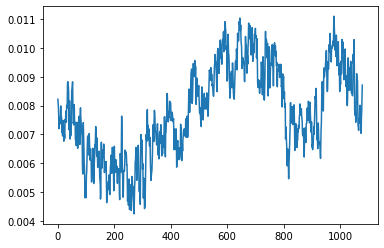

In [5]:
sr = 18000
hl = int(sr/200)
fl = hl*2
x = known_clips[101]

aud ,sr= librosa.load(x, sr)

transcription = load_clip_transcription(x)
phonemes = all_phones_to_array(transcription)

segments = split_into_segments(aud, hl, fl ,sr,energy_threshold=0.025, min_voiced_duration_ms=50)
print(aud.shape, segments      )
print("\n", transcription,"\n", phonemes, len(phonemes))
trimmed = clip_from_segments(aud, segments)

c=13
print(segments[c])
plt.plot(aud[segments[c][0]:segments[c][1]])
print(aud[segments[c][0]:segments[c][1]], segments[c])
#ipd.Audio(trimmed, rate=sr)

#ipd.Audio(aud, rate=sr)
#ipd.Audio(aud[segments[c][0]-5000:segments[c][1]], rate=sr)

0.039397966 0.0047913613 0.21109033


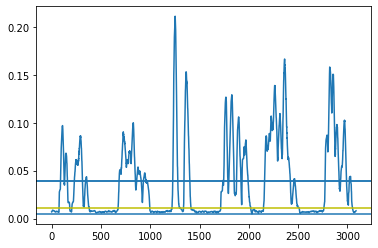

In [6]:

rms_e= librosa.feature.rms(np.abs(aud), hop_length=hl)[0]
s_avg =  np.average(rms_e)
s_mean = np.mean(rms_e)
s_min = np.amin(rms_e)
s_max = np.amax(rms_e)
bins = np.array([0,s_avg])
binned = np.digitize(rms_e,bins)
#plt.figure(figsize=(24,16))
plt.plot(rms_e)
plt.axhline(y=s_mean)
plt.axhline(y=s_avg)
plt.axhline(y=s_min)
plt.axhline(y=s_min+(s_max-s_min)*0.03 , c = 'y')
print(s_avg, s_min, s_max)
#plt.plot(np.array(binned))


In [7]:
all_bits = []
for segment in segments:
    starting = segment[0]
    ending = segment[1]
    #print(starting,ending)
    sec_energy = librosa.feature.rms(np.abs(aud[segment[0]:segment[1]]), hop_length=hop_length)
    #plt.plot(sec_energy)
    segment_boundaries = Split3(aud[starting:ending], hop_length=hl, sr=sr)
    
    for bit in segment_boundaries:
        x1 = starting + bit[0]
        x2 = starting + bit[1]
        b = (x1, x2)
        all_bits.append(b)
#all_bits = Split3(aud, hop_length=hl)
#print(all_bits ,"\n",segments,
print("\n", transcription)
print("\n transcription phonemes: ", len(phonemes), "actual bits: ", len(all_bits) )
trimmed = clip_from_segments(aud, all_bits)
#ipd.Audio(trimmed, rate=sr)
c= 10
bit = all_bits[c]
print(len(all_bits) , len(phonemes), phonemes[c] , all_bits[c] )
ipd.Audio(aud[bit[0]:bit[1]], rate=sr)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [8]:
aud[7650:11340]

array([ 0.00716193,  0.00736288,  0.00651926, ..., -0.00513949,
       -0.00376352, -0.00413457], dtype=float32)

In [6]:
counter = 0
x= exact[counter]
while len(phoneme_sections) ==0:
    transcription = load_clip_transcription(x)
    phonemes = all_phones_to_array(transcription)
    #scan for parameters
    print(x ,counter ,  len(phonemes))
    voiced , phoneme_sections, sr = process_clip(x, len(phonemes))
    counter +=1  
    x= exact[counter]
    print("next",x)
    


E:\Datasets\Voice\LibriSpeech\train-clean-100\1034\121119\1034-121119-0066.flac 0 101
next E:\Datasets\Voice\LibriSpeech\train-clean-100\1034\121119\1034-121119-0074.flac


KeyboardInterrupt: 

In [5]:
counter = 2
x= exact[counter]
transcription = load_clip_transcription(x)
phonemes = all_phones_to_array(transcription)
#scan for parameters
voiced, phoneme_sections, sr = process_clip(x, len(phonemes))
len(phoneme_sections) , counter , x
audio = librosa.load(x, sr)
#phoneme_sections, sr = process_clip(x, len(phonemes))
selection = 7
print(audio[0].shape, phoneme_sections)# , [phoneme_sections[selection][0]:phoneme_sections[selection][1]])

print(phonemes[selection], transcription)
ipd.Audio(audio[0][phoneme_sections[selection][0]-100:phoneme_sections[selection][1]+100], rate= sr)
#ipd.Audio(audio[0][0:31000],rate=sr)
#audio[phoneme_sections[selection][0]: phoneme_sections[selection][1]]
#phoneme_sections= []
#len(audio[0]), sr , x , transcription , len(phonemes)

(255170,) []
uː IT SEEMED TO HER AT LAST THAT SHE WOULD DO WELL TO TAKE A BOOK FORMERLY WHEN HEAVY HEARTED SHE HAD BEEN ABLE WITH THE HELP OF SOME WELL CHOSEN VOLUME TO TRANSFER THE SEAT OF CONSCIOUSNESS TO THE ORGAN OF PURE REASON


IndexError: list index out of range

In [ ]:
#clip_address = known_clips[22]
counter = 0 
exact = []
for x in known_clips:
    
    transcription = load_clip_transcription(x)
    phonemes_in_clip_transcription = all_phones_to_array(transcription)
    
    # not all words are in the dictionary 
    audio = load_clip(x, sr)
    segments = split_into_segments(audio,hop_length, frame_length, sr, min_voiced_duration_ms, energy_threshold)
    ##clip_from_segments(segments)
    phoneme_sections = all_phoneme_Sections_in_clip(audio, segments, sr, frame_length, hop_length, min_duration)
    #print('clip subdivisions: ',len(phoneme_sections), ' transcription phonemes : ' ,len(phonemes_in_clip_transcription))
    #print(len(phonemes_in_clip_transcription))
    #print(phonemes_in_clip_transcription)
    if len(phoneme_sections) ==len(phonemes_in_clip_transcription):
        print(counter , x)
        exact.append(x)
    counter +=1

In [ ]:
print(len(exact))
#np.save("known_clips.npy", np.array(known_clips))
#np.save("exact.npy", np.array(exact))

In [ ]:
audio = load_clip(known_clips[23], sr)
audio.shape
ipd.Audio(audio,rate=sr)
split_into_segments(audio, hop_length, frame_length, sr, min_voiced_duration_ms, energy_threshold)

In [ ]:
## segregate clips with all known words in dictionary 

counter = 0
known_clips = []
##validate data in dictionary
for clip_address in clips:
    try:
        counter +=1
        transcription = load_clip_transcription(clip_address)
        phonemes_in_clip_transcription = all_phones_to_array(transcription)
        if 'XXXXXX' not in phonemes_in_clip_transcription:
            print(counter , clip_address)
            known_clips.append(clip_address)
        else:
            print(counter, " has unknown words ")
    except:
          print("An exception occurred")
np.save("known_clips.npy", np.array(known_clips))

#####################

In [ ]:
features = []
labels = []
for x in exact[0:10]:
    #x =exact[0]
    audio = load_clip(x,sr)
    transcription= load_clip_transcription(x)
    phonemes = all_phones_to_array(transcription)
    segments = split_into_segments(audio, hop_length, frame_length,sr,min_voiced_duration_ms, energy_threshold)
    phoneme_sections = all_phoneme_Sections_in_clip(audio, segments, sr , frame_length, hop_length, min_duration)
    for i in range(len(phoneme_sections)):
        data =np.array([padding(librosa.feature.mfcc(audio[phoneme_sections[i][0]:phoneme_sections[i][1]],
                                                    hop_length=hop_length, sr=sr, n_fft= frame_length),20,60)])
        #data.append([mfcc, phonemes[i]])
        features.append(data)
        labels.append(phonemes[i])
        #adf.append(line)
    
    

In [ ]:
output = np.array(np.concatenate(features, axis=0))
len(labels), len(features) ,features[0].shape,features[1].shape,features[2].shape, features[2].shape
#for x in range(len(features)):
    #print(features[x].shape , labels[x])
features[0].shape[2]
output.shape
#data_con =np.concatenate(np.array(data))[0]

In [ ]:
#Split twice to get the validation set
X_train, X_test, y_train, y_test = train_test_split(output, np.array(labels), test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
#Print the shapes
X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val) 

In [ ]:
input_shape=(20,60)
model = tf.keras.Sequential()
#model.add(LSTM(20,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))
#model.summary()

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [ ]:
model.summary()


In [ ]:
model.fit(X_train,y_train,epochs=50 , batch_size=5, validation_data=(X_val,y_val),shuffle=False, verbose=1)

In [ ]:
np.unique(labels)

In [23]:
#np.save('raw_audio_new.npy', raw_audio)
#np.save('labels_new.npy',labels)

In [3]:
with open("raw_audio_new.npy", 'rb') as f:
    raw_audio = np.load(f, allow_pickle=True)
with open("labels_new.npy", 'rb') as f:
    labels = np.load(f, allow_pickle=True)
with open("unique_phones.npy", 'rb') as f:
    unique_phones = np.load(f, allow_pickle=True)

In [18]:
c=676
print(unique_phones[labels[c]])
ipd.Audio(raw_audio[c],rate =22000)

(3411,)

In [ ]:
raw_audio.shape

In [6]:
audio , sr = librosa.load(clips[5235],22000)
transcription = load_clip_transcription(clips[5235])
print(len(audio), transcription , len(transcription.split(" ")))
ipd.Audio(audio,rate=sr)

309980 SHE SAYS THERE IS GHOST HOW DARK IS THIS PLACE AND SO MANY OF THE RUTHYN FAMILY THEY ARE BURIED HERE IS NOT SO HOW HIGH AND THICK ARE THE TREES ALL ROUND AND NOBODY COMES NEAR 37


In [7]:
segments = Split(audio,hop_length=hop_length,frame_length=frame_length,sr= sr)

In [11]:
segment = segments[8]
s,e = segment[0],segment[1]
seg_au =audio[s:e]
transcription_pred = transcribe_audio_fb(audio=seg_au)
graphemes = all_phones_to_array(transcription_pred)
print(transcription_pred, graphemes)
ipd.Audio(seg_au[0:19040],rate=sr)

AND SO MANY O ['æ', 'n', 'd', 's', 'əʊ', 'm', 'ɛ', 'n', 'i', 'əʊ']


In [9]:
Split3(seg_au, hop_length,sr,60)

array([[    0, 19040],
       [19040, 19040]], dtype=int64)

1 91 22


11

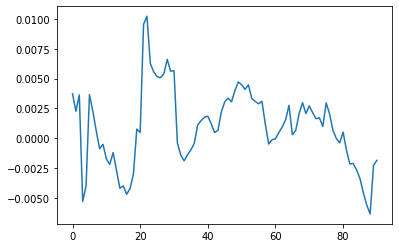

In [29]:
sec_energy = librosa.feature.rms(np.abs(seg_au), hop_length=hop_length)[0]
sec_energy = librosa.effects.preemphasis(sec_energy)
mins = signal.argrelextrema(sec_energy, np.less)[0]
other = signal.argrelmin(sec_energy)


plt.plot(sec_energy[mins])
mins2 = signal.argrelmin(sec_energy[mins])[0]
print(len(other), len(mins), len(mins2))
#mins2[0][1]
np.where(sec_energy== sec_energy[mins2[3]])
mins2[3]

(350790,)
(350790, 1)


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


 ...]

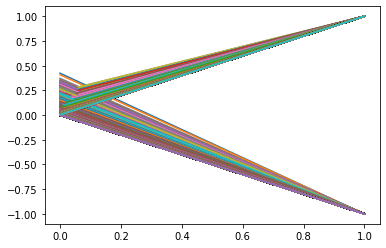

In [43]:
print(audio.shape)
yy =audio.reshape(-1,1)

print(yy.shape)
mag = librosa.magphase(audio)
filtered = librosa.decompose.decompose(np.abs(yy), n_components=1)[0]
np.array(filtered).shape
plt.plot(mag)
#ipd.Audio(filtered[4],rate=sr)

In [7]:
ipd.Audio(audio[14300:95740],rate=sr)

In [ ]:
#Split(audio,hop_length, frame_length, sr)
min_duration = 300
min_duration = int(sr/1000)*min_duration
hop_length= int(sr/200)
frame_length = int(hop_length*2.5)
f = librosa.feature.rms(audio, hop_length=hop_length,frame_length=frame_length)[0]
start, end = 0, 0
voiced = []

n = normalize(f)

above_t =   np.where(n<=0.05)[0]
for x in range(len(above_t)-1):
    #if next frame in next in sequence
    if above_t[x]+1 == above_t[x+1] and start ==0:
        start = above_t[x]
    elif above_t[x+1] > above_t[x]+1 and start !=0:
        end = above_t[x]
        voiced.append([start, end])
        start, end = 0, 0
trimmed = []

for x in voiced:
    diff = x[1]-x[0]
    if (diff*hop_length) >= min_duration:
        trimmed.append([x[0],x[1]])
if len(trimmed)==0:
    trimmed = [[0,len(audio)]]
#trimmed = np.array(trimmed)*hop_length
len(voiced) ,  len(trimmed), trimmed
# %%

